# Part I - (Toronto Bus Delay EDA)
## by Eniang, Eniang Nsa

## Introduction
> This Dataset is about the the Toronto TTc Bus Delay.
> I got this data from Kaggle and intend to explore it together with you and see if we can find any underliying patterns hidden in the data.
> The structure and shape of the data will be discussed as me proceed in the course of work. 


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
from pandas.api.types import CategoricalDtype

> Load in your dataset and describe its properties through the questions below.

In [2]:
# load our dataset
df = pd.read_csv('ttc-bus-delay-data-2022.csv')

In [3]:
# take a sneak peek at the data. See what it looks like. 
df.head()

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,1-Jan-22,320,02:00,Saturday,YONGE AND DUNDAS,General Delay,0,0,NaN,8531
1,1-Jan-22,325,02:00,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161,W,8658
2,1-Jan-22,320,02:00,Saturday,YONGE AND STEELES,Operations - Operator,17,20,S,0
3,1-Jan-22,320,02:07,Saturday,YONGE AND STEELES,Operations - Operator,4,11,S,0
4,1-Jan-22,320,02:13,Saturday,YONGE AND STEELES,Operations - Operator,4,8,S,0


In [4]:
# what is the shape of our DataFrame? what i mean is how many rows and columns are present in the DataFrame
df.shape

(27351, 10)

In [5]:
# Let's have a little information about our data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27351 entries, 0 to 27350
Data columns (total 10 columns):
Date         27351 non-null object
Route        27187 non-null object
Time         27351 non-null object
Day          27351 non-null object
Location     27351 non-null object
Incident     27351 non-null object
Min Delay    27351 non-null int64
Min Gap      27351 non-null int64
Direction    21774 non-null object
Vehicle      27351 non-null int64
dtypes: int64(3), object(7)
memory usage: 2.1+ MB


From the output above, it is obvious that we have missing values. However, some fields are not in their right format. 
This has to be dealt with.
>> ### Issues noticed from information

>> **(1) Time and Date** Both are registered here as objects which means it reads it as a string. We can't do much with this data type as it is in its wrong format. In the Cleaning Phase, we have to covert it to Datetime format for the right and proper analysis to be done in those fields.

>> **(2) Route and Directions** have missing values which has to be filled.

In [6]:
# how many missing values do we have?
df.isnull().sum()

Date            0
Route         164
Time            0
Day             0
Location        0
Incident        0
Min Delay       0
Min Gap         0
Direction    5577
Vehicle         0
dtype: int64

From the output above, we can see that we have two fields that have missing values.
The fields with missing values are Routes and Direction. 
These fields need to be cleaned before we can perform any analysis on them.

In [7]:
# so i can decide to drop the direction Field because it has a lot of missing values.
df.drop(['Direction'], axis=1, inplace=True)

### Next we need to deal with the missing values in the Routes field. 


In [8]:
# check the top 5 routes with the highest frequency.
df.Route.value_counts().head()

36    971
52    776
32    776
63    728
7     644
Name: Route, dtype: int64

From the output above, I can decide to fill the missing value with the route with the highest frequency.


In [9]:
# fill the missing value 
df.Route.fillna('36',inplace=True)


In [10]:
# check if our code worked as intended.
df.isnull().sum()

Date         0
Route        0
Time         0
Day          0
Location     0
Incident     0
Min Delay    0
Min Gap      0
Vehicle      0
dtype: int64

Now we can proceed to do type casting. Convert the fields into their right data type so we can do the analysis.


In [11]:
# let's check if we still have missing values in any of the fields.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27351 entries, 0 to 27350
Data columns (total 9 columns):
Date         27351 non-null object
Route        27351 non-null object
Time         27351 non-null object
Day          27351 non-null object
Location     27351 non-null object
Incident     27351 non-null object
Min Delay    27351 non-null int64
Min Gap      27351 non-null int64
Vehicle      27351 non-null int64
dtypes: int64(3), object(6)
memory usage: 1.9+ MB


The missing values have been dealt with. Every row has a record in them, we have no fields with missing values.

In [12]:
# let's have a look again at our DataFrame.
df.head()

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Vehicle
0,1-Jan-22,320,02:00,Saturday,YONGE AND DUNDAS,General Delay,0,0,8531
1,1-Jan-22,325,02:00,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161,8658
2,1-Jan-22,320,02:00,Saturday,YONGE AND STEELES,Operations - Operator,17,20,0
3,1-Jan-22,320,02:07,Saturday,YONGE AND STEELES,Operations - Operator,4,11,0
4,1-Jan-22,320,02:13,Saturday,YONGE AND STEELES,Operations - Operator,4,8,0


In [13]:
# convert the Date Field to datetime format.
df.Date = df.Date.apply(pd.to_datetime)

In [14]:
# Convert the time field to datetime format
df.Time = df.Time.apply(pd.to_datetime)

In [15]:
# slice the time from the Time field and update that field with time. 
# initially, the Time field consisted of both the date and time joined together. we want to separate it since we already have 
# a field with date.
df.Time = df.Time.dt.time

In [16]:
# check if the Date field is rightly formatted.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27351 entries, 0 to 27350
Data columns (total 9 columns):
Date         27351 non-null datetime64[ns]
Route        27351 non-null object
Time         27351 non-null object
Day          27351 non-null object
Location     27351 non-null object
Incident     27351 non-null object
Min Delay    27351 non-null int64
Min Gap      27351 non-null int64
Vehicle      27351 non-null int64
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 1.9+ MB


In [17]:
# the vehicle field stands for vehicle number. There's no calculations that will be done in this field so it's best to 
# convert it to a categorical variable.
df.Vehicle = str(df.Vehicle)

In [18]:
# test to see if it has changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27351 entries, 0 to 27350
Data columns (total 9 columns):
Date         27351 non-null datetime64[ns]
Route        27351 non-null object
Time         27351 non-null object
Day          27351 non-null object
Location     27351 non-null object
Incident     27351 non-null object
Min Delay    27351 non-null int64
Min Gap      27351 non-null int64
Vehicle      27351 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 1.9+ MB


### What is the structure of your dataset?

> Your answer here!
(27351, 10)
### What is/are the main feature(s) of interest in your dataset?

> Your answer here!
Location,Time,Incident,Min Delay,Day
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!
location, Time, Incident, Min Delay and Day

In [19]:
# convert the day variable to categorical
DayLabels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
M_catType = CategoricalDtype(categories = DayLabels, ordered = True)
df['Day'] = df['Day'].astype(M_catType)


## Univariate Exploration

> In this section, investigate distributions of individual variables. We're going to try and understand the different fields in our data individually to seek their uniquesness and properties doing a bivariate plot to see the relationships between variables.

### First, Let's start by checking our top 5 locations with most number of rides

In [20]:
top_5_location = df.Location.value_counts().head(5)
top_5_location_index = top_5_location.index
top_5_location_values = top_5_location.values
top_5_location

KIPLING STATION           625
KENNEDY STATION           588
PIONEER VILLAGE STATIO    583
FINCH STATION             567
EGLINTON STATION          496
Name: Location, dtype: int64

The output above shows the locations with the highest ride. I had to limit it to the 5. We have Kipling Station to be the highest with kennedy Station second to it.

### What does the top 5 distribution for the Location look like?

Text(0.5,1,'Doughnut chart for the top 5 location with the hightest Rides')

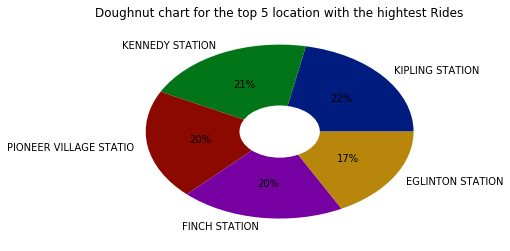

In [21]:
palette_color = sb.color_palette('dark')
plt.pie(top_5_location, labels=top_5_location_index,colors=palette_color, autopct='%.0f%%')

# draw circle
centre_circle = plt.Circle((0, 0), 0.30, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
plt.title("Doughnut chart for the top 5 location with the hightest Rides")

Here we see that Kipling is just 22%, Kennedy follows it with 21% and the next two are both 20% each. there's cleary a close or small deviation between the values of the top 5 locations.

#### let's define a function that makes us plot easily.

In [22]:
# define a function that takes the index and values and plots a bar chart.
def index_value_extractor(data,a,b,c):
    '''this function takes four arguments, extract index and value. then plots a bar chart with the remaining parameters'''
    x = np.array(data.index)
    y = np.array(data.values)
    ''' next this will plot a bar chart with the index  and values'''
    plt.bar(x,y)
    ''' now use the arguments a,b and c to label the plot generated. '''
    plt.title(a)
    plt.xlabel(b)
    plt.ylabel(c)
    plt.xticks(rotation=90)
    plt.show()

Function defined and name as index_value_extractor. The purpose of this function is to get the index and values of a data given to it. It then uses this as parameters to plot a bar graph.

In [23]:
# define parameters to be used for the function defined above.
x_label_1 = 'Locations'
y_label_1 = 'Counts'
title_1 = 'Counts Vs Location for top 10 Locations'

Use the new function defined to get bar plot of the top 10 Location in our data.

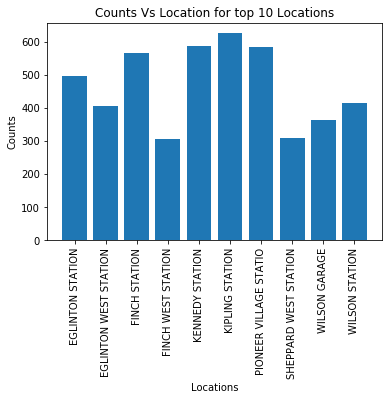

In [24]:
# create a bar plot for the top 10 frequent Locations.
top_10_location = df.Location.value_counts().head(10)
index_value_extractor(top_10_location,title_1,x_label_1,y_label_1)

From the figure above, it is seen that Kipling Station has the highest frequency. Also we can see others comming close to it. This might raise further questions if we want to drill deeper into these locations and find underlying patterns or insights.

### Reasons for Bus Delay

Next, we might be interested in the reasons for delay. That means, we have to beam our search lights on the Incident column. We're trying to figure out the frequency of the reasons why the delay happened. 

In [25]:
# create a frequency distribution for the delay incidents
reasons_for_delay = df.Incident.value_counts()

In [26]:
# create parameters to be used for plotting
title = 'Delay VS Frequency'
x_label = 'Reasons'
y_label = 'Freqency'

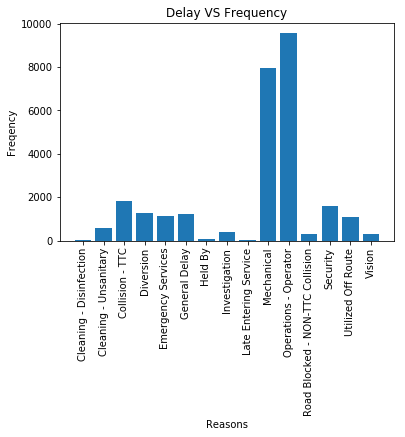

In [27]:
# plot the Incident distribution
index_value_extractor(reasons_for_delay,title, x_label, y_label)

Looks like the operations- operator had the hightest reason for delay. 
What if we want to compare the delays with the total time, to know which variable spent the longest time in delay. 

## let's see the distribution of each incident and Min delay time.

In [28]:
# total hours spent by each Incident
incident_hours = df.groupby(df['Incident'])['Min Delay'].sum()/60 # to convert the time to hours.
incident_hours

Incident
Cleaning - Disinfection                8.783333
Cleaning - Unsanitary                141.983333
Collision - TTC                      356.183333
Diversion                           2618.466667
Emergency Services                   214.266667
General Delay                        678.566667
Held By                              162.066667
Investigation                         80.133333
Late Entering Service                  7.133333
Mechanical                          1750.750000
Operations - Operator               2183.166667
Road Blocked - NON-TTC Collision     394.866667
Security                             364.683333
Utilized Off Route                   220.516667
Vision                                71.466667
Name: Min Delay, dtype: float64

The ouput above shows the total hours for each incident. It's a bit vague to easily see the highest. But we can do a better work by plotting it using our custom made function.

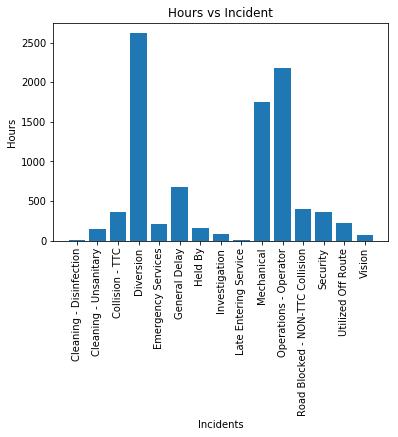

In [29]:
# plot Incident vs Hours using the function defined earlier.
index_value_extractor(incident_hours,'Hours vs Incident', 'Incidents','Hours')

Suprisingly, The plot above shows that delays that were caused due to diversions lasted longest among other reasons for the delay. Comparing it with the previous plot, we discovered that the frequency of the delay caused by diversion was relatively low. However, once they occurred, they lasted way longer than the ones that were caused by operarions-operators and Mechanical reasons.

### Now let's zoom in on days that had the longest hours of delay

In [30]:
# grouping the total delays in hours for days.
day_hours = df.groupby(['Day'])['Min Delay'].sum()/60

In [31]:
# sort the output. 
day_hours.sort_values(ascending=False)

Day
Wednesday    1520.683333
Friday       1437.233333
Thursday     1422.600000
Monday       1379.416667
Saturday     1331.683333
Tuesday      1214.800000
Sunday        946.616667
Name: Min Delay, dtype: float64

Text(0.5,1,'Number of rides each day')

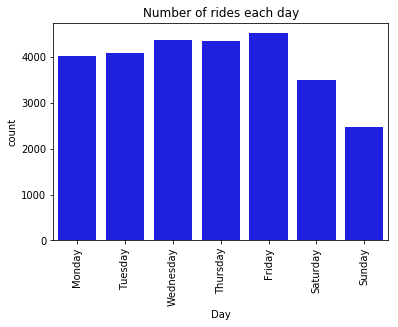

In [32]:
sb.countplot(data=df, x='Day', order=DayLabels, color='blue')
plt.xticks(rotation=90)
plt.title('Number of rides each day')

The pattern we see is quite suprising. Wednesday through Friday have the highest. other days are below it. Seems like these days are really busy. This has sunday as the least.It means that we had less activities on sunday.
Then it increases on Monday and does so for every day and declines as we get into the weekend.

## Bivariate Exploration

> In this section, investigate relationships between pairs of varibles. We started with univariate plots now it's time to extend it to bivariate. 

Text(0.5,1,'Min Gap vs Min Delay')

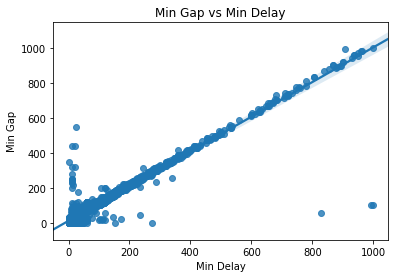

In [34]:
# a regression plot of min gap vs min delay 
sb.regplot(data = df, x= 'Min Delay', y= 'Min Gap')
plt.title('Min Gap vs Min Delay')

From the regression line plot, we see a clear positive correlation between the Min Delay and Min Gap variables.

Now let's see the distribution via a violin plot.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

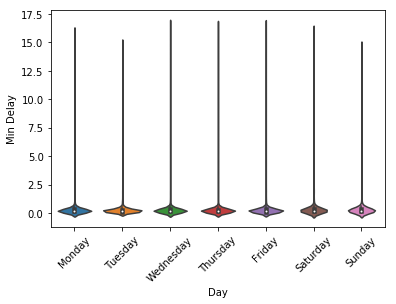

In [35]:
# a violin plot of min delays against day. 
sb.violinplot(data = df, x = "Day", y = df["Min Delay"]/60)
plt.xticks(rotation=45)

The plot above shows something striking. It seems every day of the week had extreme large values for min delay which can be seen as outliers. The min delay time here has been converted to hours.

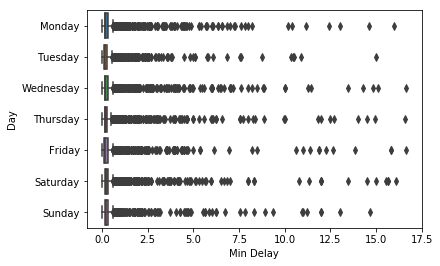

In [36]:
# a box plot of days vs min delay
sb.boxplot(data=df, y='Day', x=df['Min Delay']/60)

We can see more clearly here from the box plot that a lot of points lie outside. Each day has a lot of outliers in them.

In [37]:
# a groupby incident for the max min delay time.
df.groupby(['Incident'])['Day','Min Delay'].max().sort_values(by='Min Delay',ascending=False)

,Day,Min Delay
Incident,,
Diversion,Sunday,999
Held By,Sunday,964
General Delay,Sunday,949
Security,Sunday,830
Road Blocked - NON-TTC Collision,Sunday,735
Operations - Operator,Sunday,278
Cleaning - Disinfection,Friday,247
Mechanical,Sunday,240
Utilized Off Route,Sunday,200


The max min delay time shown above is in minutes. Something striking about our incident is that they all hard their highest or should i say longest delay time on Wednesday. This can lead to further investigation as why should they all have their highest on the same day? what is so special about this Wednesday?


In [38]:
# a groupby done for Incident and time.
df.groupby(['Incident'])['Time','Min Delay'].max().sort_values(by='Min Delay',ascending=False)

,Time,Min Delay
Incident,,
Diversion,23:57:00,999
Held By,23:33:00,964
General Delay,23:59:00,949
Security,23:58:00,830
Road Blocked - NON-TTC Collision,23:49:00,735
Operations - Operator,23:59:00,278
Cleaning - Disinfection,23:48:00,247
Mechanical,23:59:00,240
Utilized Off Route,23:58:00,200


Another strange thing happens here. We see that most of the delay time that lasted longest for each incident occurred during late hours. Most of which occurred at 11pm and only the last one at 9pm. 

In [39]:
# groupby incident and date.
df.groupby(['Incident'])['Date','Min Delay'].max().sort_values(by='Min Delay',ascending=False)

,Date,Min Delay
Incident,,
Diversion,2022-06-30,999
Held By,2022-06-24,964
General Delay,2022-06-30,949
Security,2022-06-30,830
Road Blocked - NON-TTC Collision,2022-06-30,735
Operations - Operator,2022-06-30,278
Cleaning - Disinfection,2022-06-24,247
Mechanical,2022-06-30,240
Utilized Off Route,2022-06-30,200


The date that the highest delay occurred was towards the end of the sixth month of the year. 

In [40]:
# top 10 times with highest delay frequency.
df.Time.value_counts().head(10)

16:00:00    87
15:00:00    80
14:50:00    64
14:30:00    64
17:00:00    62
14:45:00    61
18:00:00    60
17:40:00    56
14:43:00    54
17:15:00    54
Name: Time, dtype: int64

In bivariate Analysis, We now narrow in on the Incident variabble to see relation it has with the Days variable.

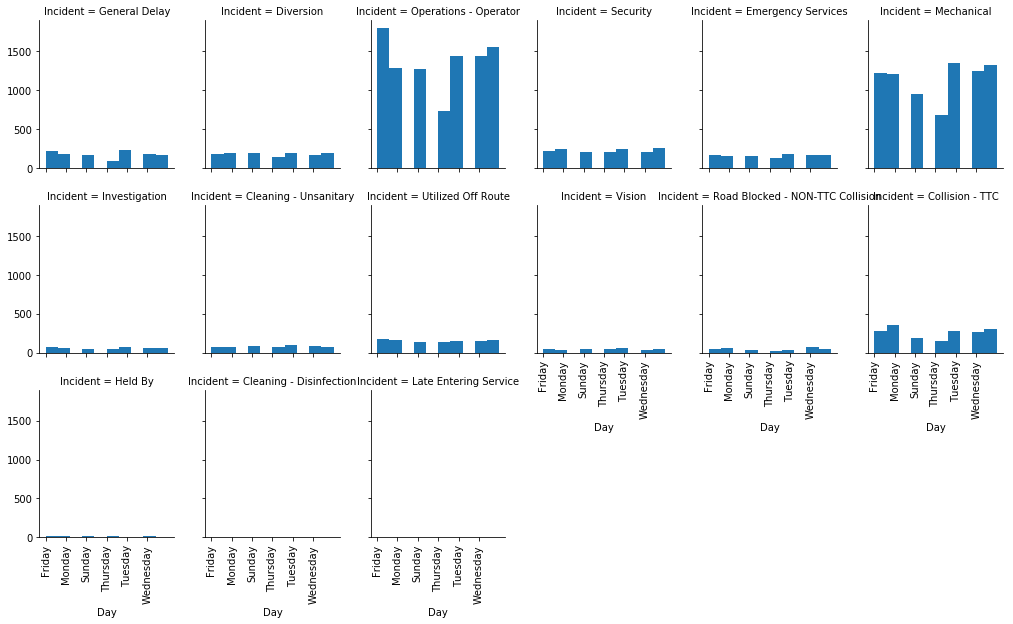

In [53]:
# Faceting
# here we plot the different incidents and the days.
g = sb.FacetGrid(data= df,col = 'Incident',col_wrap=6);
g.map(plt.hist, 'Day')
g.fig.set_size_inches(14, 8)
# iterate over axes of FacetGrid
for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    ax.set_xticklabels(labels, rotation=90) # set new labels
plt.show()


### Which Incidents have the Highest frequencies and which days are seen.
>> Operations and Mechanical. The Operation has its Highest on Fridays and Wednesday. Whereas the Mechanical seems to have a unimodal Distribution as we see. Other Incidents are fairly low

Let's have a look at the average min delay against the days. 

Text(0,0.5,'Avg. Min Delay')

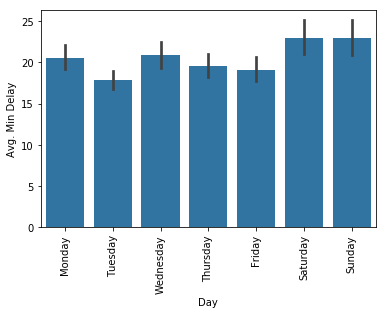

In [42]:
# plot showing the average Min delay for each day with its standard deviation.
base_color = sb.color_palette()[0]
sb.barplot(data=df, x='Day', y='Min Delay', color=base_color)
plt.xticks(rotation=90);
plt.ylabel('Avg. Min Delay')

Suprisingly, Saturdays and Sundays have large values. Maybe there could be some outliers which is causing it to be that large. Because we expect there to be a shortage of delays because most people should be at home with their families. But it actually ahs a small deviation as we can see from the plot. Well it's possible there could be some other activities that caused it to rise on the weekends.

Let's also take a look at the Min Delay and each incident. Pay attention to the deviations.

Text(0.5,1,'Min Delay vs Incident')

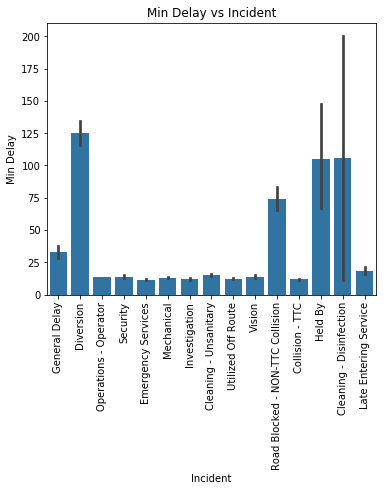

In [43]:
# plot showing min delay vs incident
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sb.barplot(data=df, x='Incident', y='Min Delay', color = base_color)
plt.xticks(rotation = 90);
plt.title('Min Delay vs Incident')

Mechanical and operations have a low Min time with smaller deviations. Diversion has a much higher Min delay time than these two(mechanical and operations) which have the highest frequecy of occurrence.

Incident like Held by and cleaning had high Min Delay, buth the also had higher deviation than they rest.

Let's buttress this point by using a point plot to illustrate this deviation.

Text(0.5,1,'Average Min Delay vs Incident with deviation.')

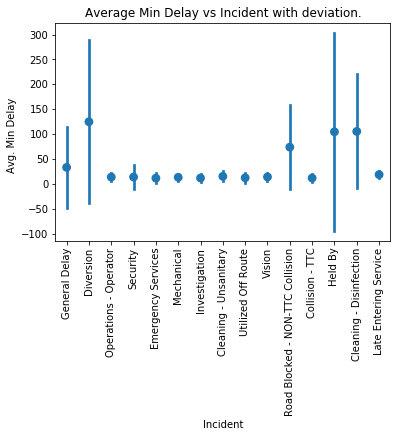

In [44]:
# pointplot for avg. Min Delay vs Incident
sb.pointplot(data=df, x='Incident', y='Min Delay', color=base_color, ci='sd', linestyles="")
plt.xticks(rotation=90);
plt.ylabel('Avg. Min Delay  ')
plt.title("Average Min Delay vs Incident with deviation.")

The output above shows average  minimum delay time for each incident that caused delay. We can also see the spread in terms of the deviation away from the mean. The incidents that had the Largest deviations were General Delay, Diversion, Road Block, Held By and Cleaning. Others had relatively little or no deviations which means its averages were typical representation of the values for those fields.

Text(0.5,1,'Avg.Min Delay vs Day with deviations')

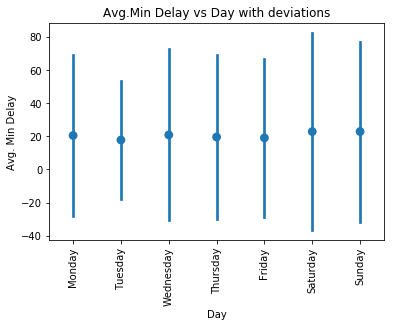

In [45]:
# avg min delay against days
sb.pointplot(data=df, x='Day', y='Min Delay', color=base_color, ci='sd', linestyles="")
plt.xticks(rotation=90);
plt.ylabel('Avg. Min Delay')
plt.title("Avg.Min Delay vs Day with deviations")

Seems like for the mean of the Min Delay, there was a large deviation for the days as clearly seen from graph. Saturdays has a mean delay of about 20 minutes with a large deviation followed by Wednesday.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

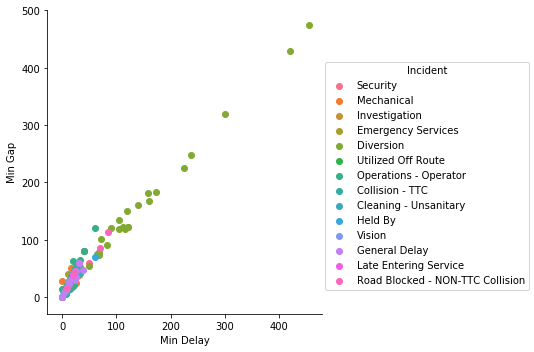

In [46]:
g = sb.FacetGrid(data = df.sample(500), hue = 'Incident', size = 5)
g.map(plt.scatter, 'Min Delay', 'Min Gap')
g.add_legend()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

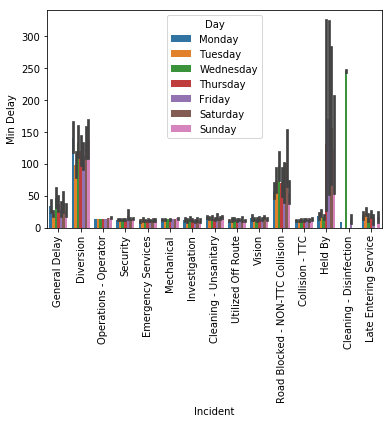

In [47]:
ax = sb.barplot(x="Incident", y="Min Delay", hue="Day",dodge=True, data=df)
plt.xticks(rotation=90)


Now let's proceed to a faceting plot. We're interested in seeing each incident distribution with the minimum delay time. So we're asking, for each incident, what is the daily distribution in terms of min delay time.  

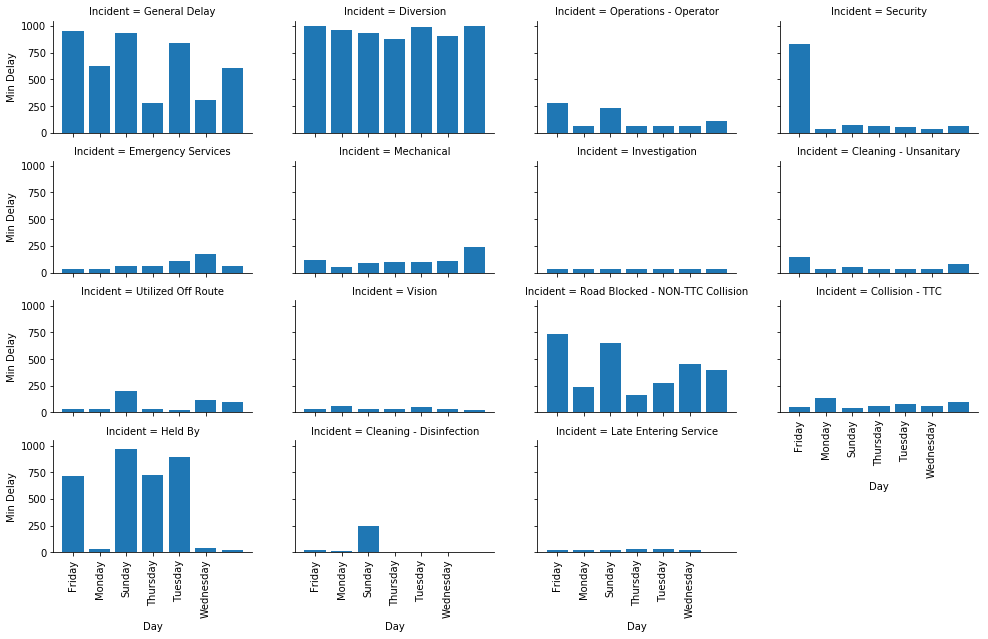

In [48]:
# Faceting plot showing the relationship for the daily incident and min delay.
g = sb.FacetGrid(data= df,col = 'Incident',col_wrap=4);
g.map(plt.bar, 'Day','Min Delay')
g.fig.set_size_inches(14, 8)
# iterate over axes of FacetGrid
for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    ax.set_xticklabels(labels, rotation=90) # set new labels
plt.show()

Still investigating, we get to see that for each incident, the daily min delay time was smaller for mechanical and operation. diversion had higher for all the days it occurred. 


So what it means is that, if the reason for delay is Diversion,then expect a longer delay time.

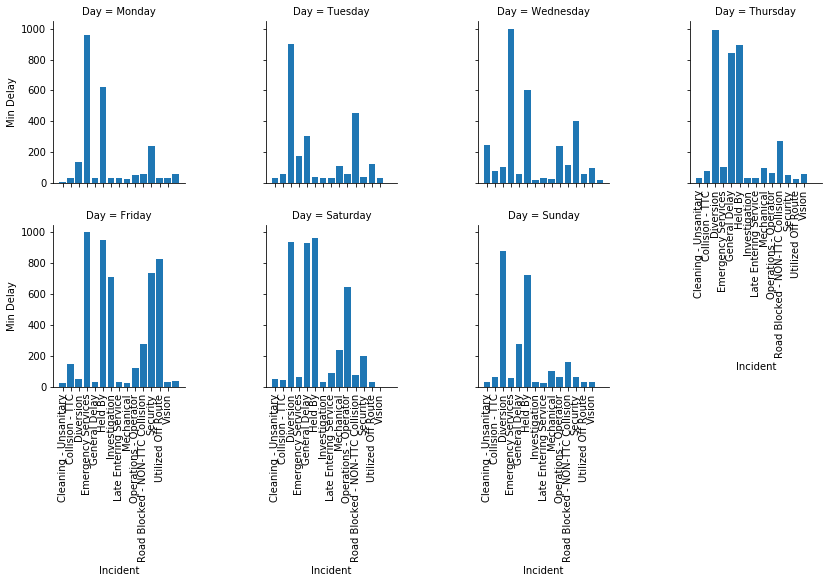

In [49]:
# Faceting daily plot for incident. 
g = sb.FacetGrid(data= df,col = 'Day',col_wrap=4);
g.map(plt.bar, 'Incident','Min Delay')
# iterate over axes of FacetGrid
for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    ax.set_xticklabels(labels, rotation=90) # set new labels
plt.show()

>> For Saturday, Collision, emergency and general delay had the highest.
>> Sunday had collision and General Delay as the Highest while others had relaive low time.
>> Monday, Collision and General Delay
>> Tuesday has Collision and operations topped the list.
>> Wednesday Diversion and General had high min delay time.
>> Thursday Collision came back to the top, followed by General and emergency.
>> Friday collision was suprisingly low with others showing up as high.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

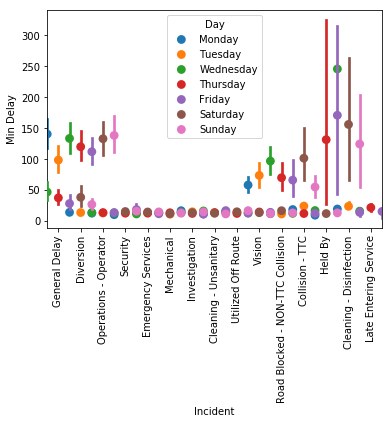

In [50]:
# The mean min delay for the daily incident.
ax = sb.pointplot(data = df, x = 'Incident', y = 'Min Delay', hue = 'Day', dodge = 3, linestyles = "")
plt.xticks(rotation=90)

## Conclusions
> The project began with sourcing for data to be used for the analysis. I downloaded the Toronto Bus Delay data.

Then i proceeded to importing the necessary libraries and tools i'll be using. Cleaned the data and went straight into the exploration of the Data.

### Key Findings.
>>> I performed 3 Different types of Analysis. Univariate, Bivariate and Multivariate analysis. 
#### Top 5 Location
>> (1) Kipling Station
>> (2) Kennedy Station
>> (3) Pioneer Village Station
>> (4) Finch Station
>> (5) Eglington Station
    
### Top Reasons for Delay  
>> The Incidents that showed up most for delay were Operations and Mechanical.

### Top Total hours Spent
>> (1) Diversion
>> (2) Operations
>> (3) Mechanical
    
    
    
### Days with the Longest Delays in hours
>>> (1) Wednesday had the highest
    (2) Thursday was the second
    (3) Friday and Saturdays are next.
    (4) Sunday had the lowest and it spiked again on monday. 
    
    
    
### Zoom in on the Incident Field
Delay caused by Operation had the highest frquency for all days of the week. Mechanical had similar amount for all the days of the week.



The Barplot revealed that mean hours for Diversion had the highest Min Delay with a small deviation.  
    
    
    
    